In [30]:
import pandas as pd 
import numpy as np  

import matplotlib.pyplot as plt
from vmdpy import VMD

In [12]:
def decompose_series_vmd(time_series:np.array, k_nmodes:int)-> np.array:
 
    print(f"Decomposing time_series in {k_nmodes} nmodes")
    
    #time_series = time_series.to_list()

    alpha = 2000     # moderate bandwidth constraint  
    tau = 0           # noise-tolerance (no strict fidelity enforcement)  
    k_nmodes = k_nmodes           # n modes  
    DC = 0             # no DC part imposed  
    init = 0           # initialize omegas uniformly  
    tol = 1e-6
    u, u_hat, omega = VMD(time_series,alpha,tau,k_nmodes,DC,init,tol)

    return(u)

In [42]:
random_array = np.random.randint(0, 11, size=200)
u = decompose_series_vmd(time_series = random_array, k_nmodes=3)

Decomposing time_series in 3 nmodes


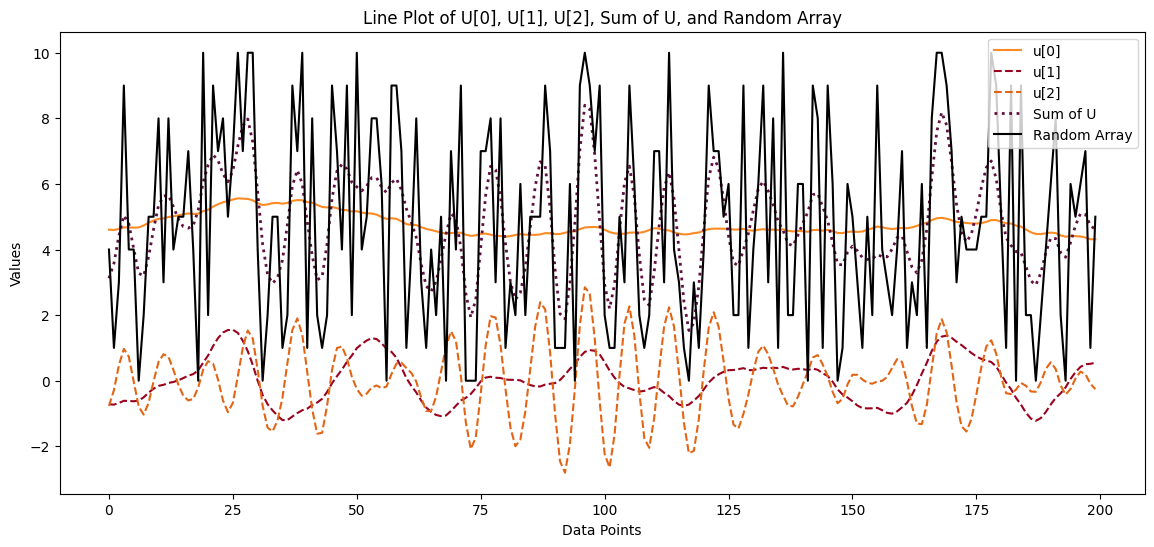

In [51]:
# Create a DataFrame for plotting
df = pd.DataFrame({'u[0]': u[0], 'u[1]': u[1], 'u[2]': u[2], 'Sum of U': np.sum(u, axis=0), 'Random Array': random_array})

# Set up the Matplotlib plot
plt.figure(figsize=(14, 6))

# Plot individual lines with different styles
plt.plot(df['u[0]'], label='u[0]', linestyle='-', color = "#FB8B24")
plt.plot(df['u[1]'], label='u[1]', linestyle='--', color = "#9A031E")
plt.plot(df['u[2]'], label='u[2]', linestyle='--' , color = "#E36414")
plt.plot(df['Sum of U'], label='Sum of U', color='#5F0F40', linewidth=2, linestyle='dotted')
plt.plot(df['Random Array'], label='Random Array', linestyle='-', color = 'black')

# Set plot labels and title
plt.title('Line Plot of U[0], U[1], U[2], Sum of U, and Random Array')
plt.xlabel('Data Points')
plt.ylabel('Values')

# Display the legend
plt.legend()

# Save the figure
plt.savefig('/mnt/e/github/load-forecast/vmd.png', bbox_inches='tight')  # Added bbox_inches='tight'
# Show the plot
plt.show()

